# Marketing data set

This notebook is written to analyze the template data set obtained from https://www.kaggle.com/jackdaoud/marketing-data. It serves as a practice for myself and a demonstration of my basic data analysis knowledge.

# Basic set up

Import the packages needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
df = pd.read_csv('marketing_data.csv')

In [3]:
df.iloc[:,0:15].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34


In [4]:
df.iloc[:,15:].head()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,2,3,1,2,7,1,0,0,0,0,1,0,SP


# Columns information

| column | information |
|--------------------|--------------------|
|ID: |Customer's unique identifier|
|Year_Birth: |Customer's birth year|
|Education: |Customer's education level|
|Marital_Status: |Customer's marital status|
|Income: |Customer's yearly household income|
|Kidhome: | Number of children in customer's household|
|Teenhome: | Number teenagers in customer's household|
|Dt_Customer: | Date of customer's enrollment with the company|
|Recency: | Number of days since customer's last purchase|
|MntWines: | Amount spent on wine in the last 2 years|
|MntFruits: | Amount spent on fruits in the last 2 years|
|MntMeatProducts: | Amount spent on meat in the last 2 years|
|MntFishProducts: | Amount spent on fish in the last 2 years|
MntSweetProducts: | Amount spent on sweets in the last 2 years|
|MntGoldProds: | Amount spent on gold in the last 2 years|
| NumDealsPurchases: | Number of purchases made with a discount|
| NumWebPurchases: | Number of purchases made through the company's web site|
| NumCatalogPurchases: | Number of purchases made using a catalogue|
| NumStorePurchases: | Number of purchases made directly in stores|
| NumWebVisitsMonth: | Number of visits to company's web site in the last month|
| AcceptedCmp3: | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise|
| AcceptedCmp4: | 1 if customer accepted the offer in the 4th campaign, 0 otherwise|
| AcceptedCmp5: | 1 if customer accepted the offer in the 5th campaign, 0 otherwise|
| AcceptedCmp1: | 1 if customer accepted the offer in the 1st campaign, 0 otherwise|
| AcceptedCmp2: | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise|
| Reponse: | 1 if customer accepted the offer in the last campaign, 0 otherwise|
| Complain: | 1 if customer complained in the last 2 years, 0 otherwise|
| Country: | Customer's location|

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

## Column preprocessing

Right now, column ' Income ' is not ready for processing.

In [7]:
df.rename( columns = { ' Income ':'Income'}, inplace = True)
# Changing the column name from ' Income' to 'Income'

In [8]:
df['Income'] = df['Income'].str.replace( '$', '')
df['Income'] = df['Income'].str.replace( ',', '')
df['Income'] = df['Income'].astype( float)
# Removing the non-numeric symbols in the data
# Changing the data type from string to float

<ipython-input-8-198f8c5a860a>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Income'] = df['Income'].str.replace( '$', '')


In [9]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


It will be convenient to sort Education and Marital_Status.

In [54]:
df[ 'Education'] = df['Education'].astype( 'category')
df[ 'Education'].unique() # To show the unique values of education levels.

['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic']
Categories (5, object): ['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic']

In [55]:
df[ 'Education'] = df[ 'Education'].cat.reorder_categories( [ 'Basic', 'Graduation', '2n Cycle', 'Master', 'PhD'])

In [56]:
df[ 'Education']

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4       Graduation
           ...    
2235           PhD
2236      2n Cycle
2237    Graduation
2238    Graduation
2239           PhD
Name: Education, Length: 2240, dtype: category
Categories (5, object): ['Basic', 'Graduation', '2n Cycle', 'Master', 'PhD']

In [37]:
df[ 'Marital_Status'] = df['Marital_Status'].astype( 'category')
df[ 'Marital_Status'].unique() # To show the unique values of marital statuses.

['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO', 'Alone', 'Absurd']
Categories (8, object): ['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO', 'Alone', 'Absurd']

In [38]:
df[ 'Martial_Status'] = df[ 'Marital_Status'].cat.reorder_categories( [ 'Alone', 'YOLO', 'Single',
                                                                      'Together', 'Married', 'Divorced',
                                                                      'Widow', 'Absurd'])

The section below attempted to identify and replace the missing values.

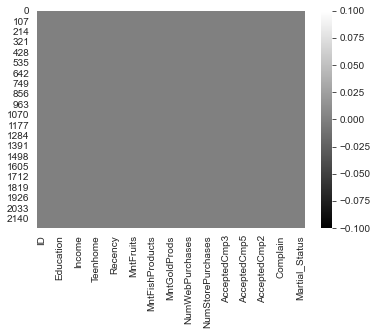

In [39]:
sns.heatmap( df.isnull(), cmap = 'gray')
plt.show()

In [40]:
df.isna().sum().sort_values( ascending = False)

ID                     0
NumDealsPurchases      0
Country                0
Complain               0
Response               0
AcceptedCmp2           0
AcceptedCmp1           0
AcceptedCmp5           0
AcceptedCmp4           0
AcceptedCmp3           0
NumWebVisitsMonth      0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
MntGoldProds           0
Year_Birth             0
MntSweetProducts       0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Dt_Customer            0
Teenhome               0
Kidhome                0
Income                 0
Marital_Status         0
Education              0
Martial_Status         0
dtype: int64

Missing values were found in the column Income.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income'>

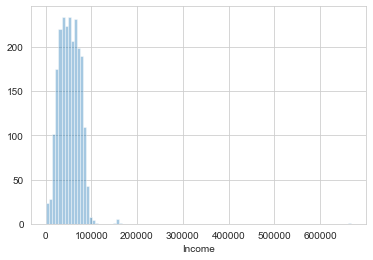

In [41]:
sns.set_style( 'whitegrid')
sns.distplot( df['Income'], kde = False, bins = 100)

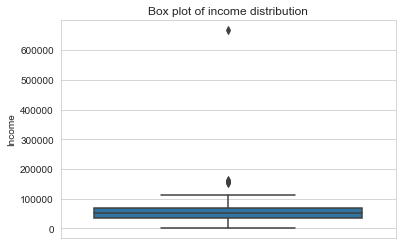

In [42]:
sns.boxplot( y = df['Income']).set_title( 'Box plot of income distribution')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


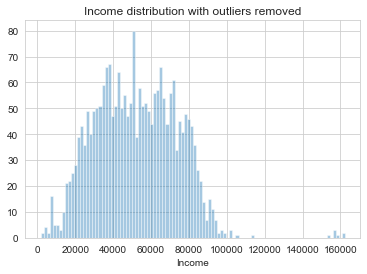

In [43]:
sns.distplot( 
    df[ df['Income'] < 400000]['Income'], kde = False, bins = 100).set_title( 'Income distribution with outliers removed')
plt.show()

In [44]:
df['Income'].fillna( np.nanmedian( df['Income']), inplace = True)

<AxesSubplot:>

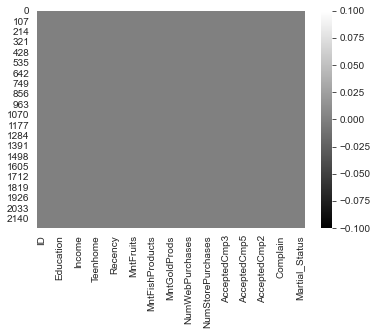

In [45]:
sns.heatmap( df.isnull(), cmap = 'gray')

In [46]:
df.isna().sum().sort_values( ascending = False)

ID                     0
NumDealsPurchases      0
Country                0
Complain               0
Response               0
AcceptedCmp2           0
AcceptedCmp1           0
AcceptedCmp5           0
AcceptedCmp4           0
AcceptedCmp3           0
NumWebVisitsMonth      0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
MntGoldProds           0
Year_Birth             0
MntSweetProducts       0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Dt_Customer            0
Teenhome               0
Kidhome                0
Income                 0
Marital_Status         0
Education              0
Martial_Status         0
dtype: int64

No more missing values

In [47]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Martial_Status'],
      dtype='object')

# Research Question 1: customers' characteristics and sales

## Education level and sales

In [79]:
df[ ['Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

,Education,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Graduation,189,104,379,111,189,218
1,Graduation,464,5,64,7,0,37
2,Graduation,134,11,59,15,2,30
3,Graduation,10,0,1,0,0,0
4,Graduation,6,16,24,11,0,34
...,...,...,...,...,...,...,...
2235,PhD,372,18,126,47,48,78
2236,2n Cycle,5,10,13,3,8,16
2237,Graduation,185,2,88,15,5,14
2238,Graduation,267,38,701,149,165,63


In [80]:
Edu_x_Sales = df.pivot_table( index = 'Education', values = [ 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                  aggfunc = 'mean')
Edu_x_Sales

,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Education,,,,,,
Basic,17.055556,11.111111,22.833333,11.444444,12.111111,7.240741
Graduation,43.149956,30.774623,50.849157,179.488909,31.367347,284.268855
2n Cycle,47.482759,28.955665,46.399015,141.256158,34.251232,198.182266
Master,32.100000,21.654054,40.397297,163.378378,21.175676,333.075676
PhD,26.728395,20.049383,32.310700,168.602881,20.222222,404.495885


<AxesSubplot:xlabel='Education'>

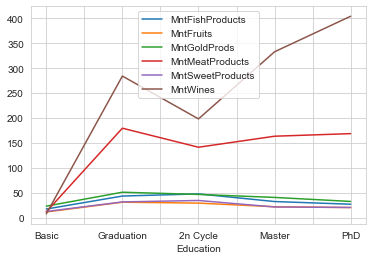

In [81]:
Edu_x_Sales.plot()

<AxesSubplot:xlabel='Education'>

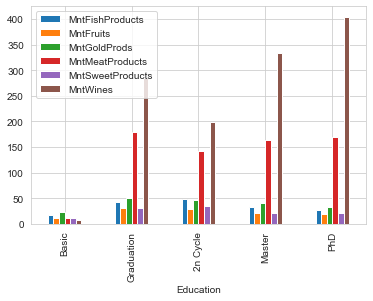

In [82]:
Edu_x_Sales.plot.bar()

It is clear that customer with basic education level purchase less. Others purchase with the most amount in Meat products and Wines. Amount spent on Gold products and Sweet products is consistently low among all groups.

## Complaint and sales

In [84]:
df[ ['Complain', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,189,104,379,111,189,218
1,0,464,5,64,7,0,37
2,0,134,11,59,15,2,30
3,0,10,0,1,0,0,0
4,0,6,16,24,11,0,34
...,...,...,...,...,...,...,...
2235,0,372,18,126,47,48,78
2236,0,5,10,13,3,8,16
2237,0,185,2,88,15,5,14
2238,0,267,38,701,149,165,63


In [86]:
Cpln_x_Sales = df.pivot_table( index = 'Complain', values = [ 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                  aggfunc = 'mean')
Cpln_x_Sales

,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Complain,,,,,,
0,37.636773,26.322217,44.178459,167.465525,27.153222,305.212708
1,25.761905,24.190476,27.476190,112.476190,17.523810,169.000000


<AxesSubplot:xlabel='Complain'>

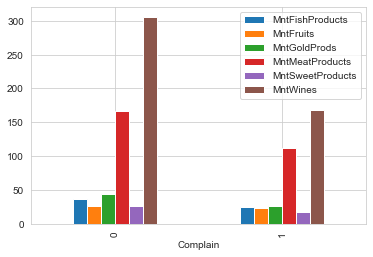

In [87]:
Cpln_x_Sales.plot.bar()